In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import os

import numpy as np
import pandas as pd

import misc
import plotting
import stats
#import pystan

reload(misc)
reload(plotting)

#first_year = 1996
first_year = 1992
last_year = 2012

use_body = True

data_dir = '.'
data_file = os.path.join(data_dir, 'ssm_with_metadata_2017_05_25.csv')
data = misc.read_article_data(data_file, first_year, last_year, rename_frames=True, use_body=use_body)
print "Loaded data for %d articles" % len(data.index)

data['tone'] = data['Pro'] - data['Anti']

tone_annotations = misc.read_article_data(os.path.join(data_dir, 'samesex_tone_annotations.csv'), first_year, last_year, exclude_irrelevant=False)
print "Loaded tone annotations for %d articles" % len(tone_annotations.index)

tone_annotations['tone'] = tone_annotations['Pro'] - tone_annotations['Anti']

framing_annotations = misc.read_article_data(os.path.join(data_dir, 'samesex_framing_annotations.csv'), first_year, last_year, exclude_irrelevant=False)
#framing_annotations = misc.compute_entropy(framing_annotations)
print "Loaded framing annotations for %d articles" % len(framing_annotations.index)

last_date = data['date'].max()
print "Last date = ", last_date


Loaded data for 7595 articles
Loaded tone annotations for 6904 articles
Loaded framing annotations for 3371 articles
Last date =  2012-12-31 00:00:00


In [61]:
# extract periods from dates
reload(misc)
data = misc.convert_dates(data, first_year)
tone_annotations = misc.convert_dates(tone_annotations, first_year)
#framing_annotations = misc.convert_dates(framing_annotations, first_year)

Grouped data into 84 periods


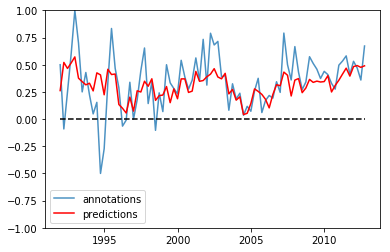

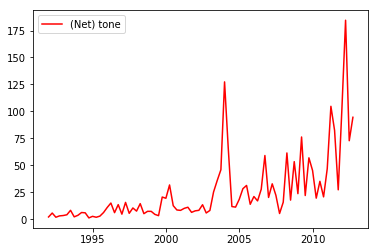

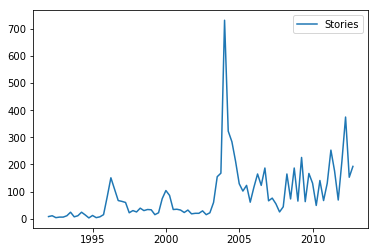

In [62]:
# decide how to group data
#group_by = 'month'
group_by = 'quarter'
#group_by = 'year'

reload(misc)
reload(plotting)

grouped = misc.group_article_data(data, group_by, first_year, group_tone=True, group_frames=True, group_directness=False)
grouped_tone_annotations = misc.group_article_data(tone_annotations, group_by, first_year, group_tone=True)
#grouped_framing_annotations = misc.group_article_data(framing_annotations, group_by, first_year, group_frames=True)

print "Grouped data into %d periods" % len(grouped.index)

fig, ax = plt.subplots()
#ax.fill_between(grouped_tone_annotations.f_date,  tone+tone_sd*2, tone-tone_sd*2, facecolor='grey', edgecolor='white', alpha=0.6)
ax.plot(grouped_tone_annotations.f_date, grouped_tone_annotations.tone / grouped_tone_annotations.stories, label='annotations', alpha=0.8)
ax.plot(grouped.f_date, grouped.tone / grouped.stories , 'r', label='predictions')
ax.plot([grouped.f_date.min(), grouped.f_date.max()], [0, 0], 'k--')
#ax.plot(grouped.f_date, grouped.Pro, c='purple', label='Pro')
#ax.plot(grouped.f_date, grouped.Anti, c='orange', label='Anti')
#ax.plot(grouped.f_date, grouped.Neutral, c='green', label='Neutral')
ax.legend(loc='lower left')
ax.set_ylim(-1, 1)

fig, ax = plt.subplots()
ax.plot(grouped.f_date, grouped.tone , 'r', label='(Net) tone')
ax.legend()

fig, ax = plt.subplots()
ax.plot(grouped.f_date, grouped.stories , label='Stories')
ax.legend()


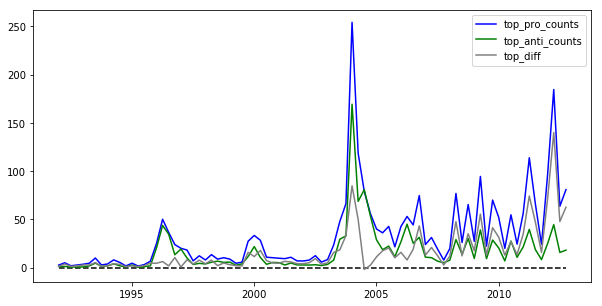

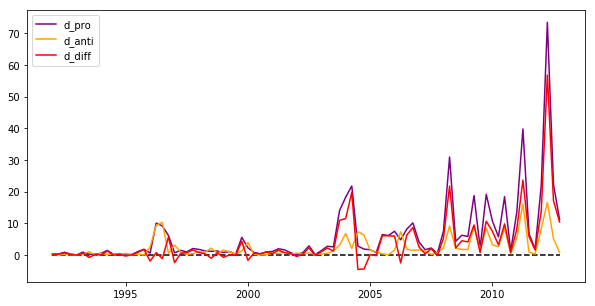

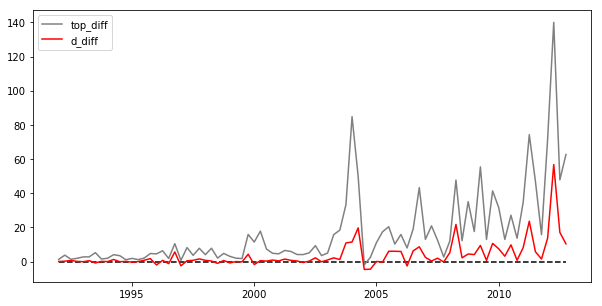

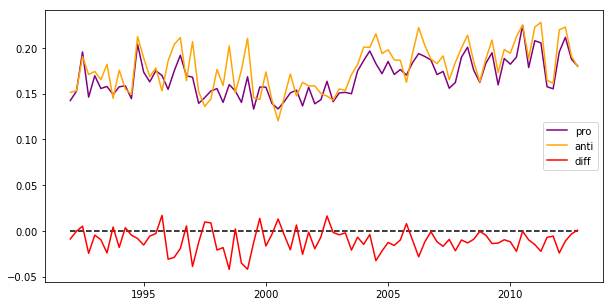

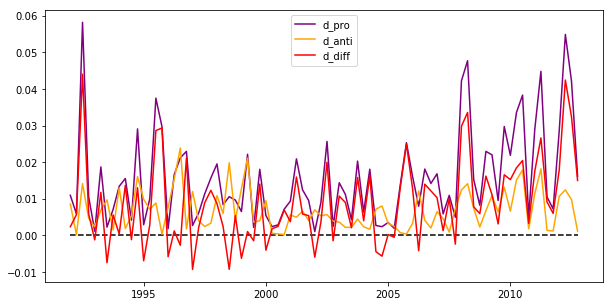

In [64]:
reload(misc)

grouped = misc.compute_entropy(grouped)
grouped['toneXentropy'] = grouped['tone'] * grouped['entropy']
    
grouped = misc.compute_dominance(grouped)
#grouped_framing_annotations = misc.compute_entropy(grouped_framing_annotations)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', label=None)
ax.plot(grouped.f_date, grouped.top_pro_counts, c='blue', label='top_pro_counts')
ax.plot(grouped.f_date, grouped.top_anti_counts, c='green', label='top_anti_counts')
ax.plot(grouped.f_date, grouped.top_pro_counts - grouped.top_anti_counts, c='grey', label='top_diff')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', label=None)
ax.plot(grouped.f_date, grouped.d_pro, c='purple', label='d_pro')
ax.plot(grouped.f_date, grouped.d_anti, c='orange', label='d_anti')
grouped['d_diff'] = grouped['d_pro'] - grouped['d_anti']
ax.plot(grouped.f_date, grouped.d_pro - grouped.d_anti, c='red', label='d_diff')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', label=None)
ax.plot(grouped.f_date, grouped.top_pro_counts - grouped.top_anti_counts, c='grey', label='top_diff')
ax.plot(grouped.f_date, grouped.d_pro - grouped.d_anti, c='red', label='d_diff')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', label=None)
ax.plot(grouped.f_date, grouped.top_pro_percent, c='purple', label='pro')
ax.plot(grouped.f_date, grouped.top_anti_percent, c='orange', label='anti')
ax.plot(grouped.f_date, grouped.top_pro_percent - grouped.top_anti_percent, c='red', label='diff')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', label=None)
ax.plot(grouped.f_date, grouped.d_pro_percent, c='purple', label='d_pro')
ax.plot(grouped.f_date, grouped.d_anti_percent, c='orange', label='d_anti')
ax.plot(grouped.f_date, grouped.d_pro_percent - grouped.d_anti_percent, c='red', label='d_diff')
ax.legend()


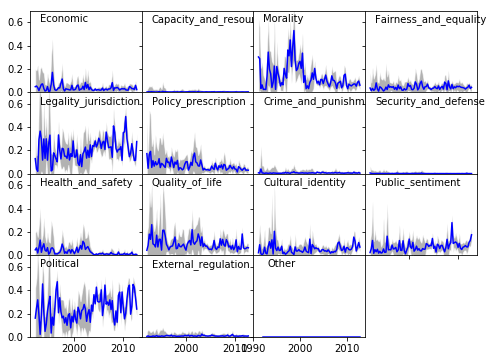

In [10]:
reload(plotting)
plotting.plot_frames(grouped, ymax=0.7)


set([12, 4, -1])
{4: '#d95f02', 12: '#1b9e77', -1: '#7570b3'}
set(['#1b9e77', '#d95f02'])


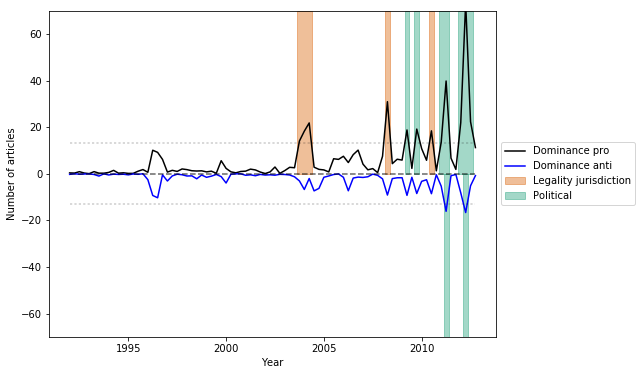

In [20]:
import re
reload(misc)
grouped = misc.compute_entropy(grouped)
grouped['toneXentropy'] = grouped['tone'] * grouped['entropy']

CB6 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']

threshold = 13
grouped = misc.compute_dominance(grouped, threshold=threshold)
#grouped_framing_annotations = misc.compute_entropy(grouped_framing_annotations)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(grouped.f_date, grouped.d_pro, c='black', label='Dominance pro')
ax.plot(grouped.f_date, -grouped.d_anti, c='blue', label='Dominance anti')
grouped['d_diff'] = grouped['d_pro'] - grouped['d_anti']
#grouped['d_diff2'] = grouped['d_pro2'] - grouped['d_anti2']
#ax.plot(grouped.f_date, grouped.d_pro - grouped.d_anti, c='red', label='d_diff')

pos_spans = []
anti_spans = []
pos_cur = -1
anti_cur = -1
top_set = set()
delta = grouped.iloc[1].f_date - grouped.iloc[0].f_date

for i, index in enumerate(grouped.index):
    row = grouped.loc[index]
    if row.top_pro != pos_cur:
        if i > 0 and pos_cur >= 0:
            pos_spans[-1] += [row.f_date - delta/2.0, pos_cur]
        if i < len(grouped.index) and row.top_pro >= 0:
            pos_spans.append([row.f_date - delta/2.0])
        pos_cur = row.top_pro
    if i == len(grouped.index) - 1 and pos_cur >= 0:
        pos_spans[-1] += [row.f_date + delta/2.0, pos_cur]
    top_set.add(int(row.top_pro))

    if row.top_anti != anti_cur:
        if i > 0 and anti_cur >= 0:
            anti_spans[-1] += [row.f_date - delta/2.0, anti_cur]
        if i < len(grouped.index) and row.top_anti >= 0:
            anti_spans.append([row.f_date - delta/2.0])
        anti_cur = row.top_anti
    if i == len(grouped.index) - 1 and anti_cur >= 0: 
        anti_spans[-1] += [row.f_date + delta/2.0, anti_cur]
    top_set.add(int(row.top_anti))

print top_set
    
# UNCOMMENT THIS LINE TO REFRESH COLOURS
colors = dict(zip(list(top_set), CB6))
print colors 

ylim = 70

colors_used = set()
for span in pos_spans:
    start, end, frame = span
    color = colors[frame]
    if color in colors_used:
        ax.axvspan(start, end, ymin=0.5, ymax=1, alpha=0.4, facecolor=color, edgecolor=color, label=None)
    else:
        ax.axvspan(start, end, ymin=0.5, ymax=1, alpha=0.4, facecolor=color, edgecolor=color, label=re.sub('_', ' ', misc.FRAMES[int(frame)]))
        colors_used.add(color)

for span in anti_spans:
    start, end, frame = span
    color = colors[frame]
    if color in colors_used:
        ax.axvspan(start, end, ymin=0, ymax=0.5, alpha=0.4, facecolor=color, edgecolor=color, label=None)
    else:
        ax.axvspan(start, end, ymin=0, ymax=0.5, alpha=0.4, facecolor=color, edgecolor=color, label=re.sub('_', ' ', misc.FRAMES[int(frame)]))
        colors_used.add(color)

print colors_used

ax.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', alpha=0.6, label=None)
ax.plot(grouped.f_date, np.ones_like(grouped.f_date)*threshold, 'k:', alpha=0.2)
ax.plot(grouped.f_date, -np.ones_like(grouped.f_date)*threshold, 'k:', alpha=0.2)
ax.set_ylim(-ylim, ylim)
ax.set_ylabel('Number of articles')
ax.set_xlabel('Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('/Users/dcard/Desktop/samesex_dominance_' + str(threshold) + '.pdf', bbox_inches='tight')

1992
Loaded 164 polls
        Issue    Varname   House     Date  Topic  Subcode    L1    L2   L3  \
257  same-sex    HOMOMAR  GALLUP  3/15/96    150      151  27.0   0.0  0.0   
62   same-sex     GAYWED    PSRA  5/31/96    150      151   6.0  21.0  0.0   
248  same-sex      ABCCU   ABCWP   8/1/96    150      151  37.0   0.0  0.0   
258  same-sex    HOMOMAR  GALLUP   2/8/99    150      151  35.0   0.0  0.0   
150  same-sex  GAYWEDFOX     FOX  1/12/00    150      151  19.0  24.0  0.0   

      L4    ...     ABCCU  PSGAYUN  GAYWEDFOX  ABCBAN  MARHOMO  GAYMAR BANMAR  \
257  0.0    ...         0        0          0       0        0       0      0   
62   0.0    ...         0        0          0       0        0       0      0   
248  0.0    ...         1        0          0       0        0       0      0   
258  0.0    ...         0        0          0       0        0       0      0   
150  0.0    ...         0        0          1       0        0       0      0   

     GAYAMEND  CIVUNIO

(<matplotlib.figure.Figure at 0x10e941990>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10e937cd0>)

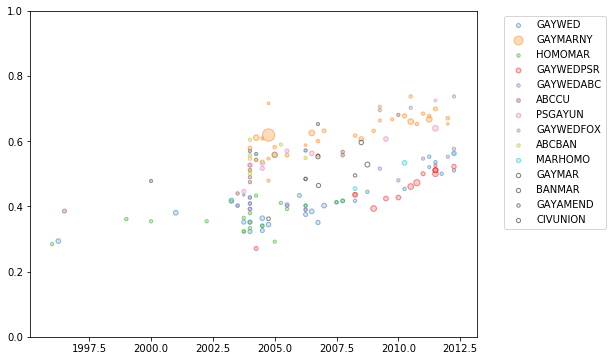

In [21]:
reload(misc)

filename = 'samesex_marriage_polls.csv'
print first_year
polls = misc.load_polls(filename, first_year, last_date)
# drop one poll that seems redundant (with a seeming mistake)
polls = polls[polls['Varname'] != 'IMMLEGAL']
polls = misc.get_f_dates(polls, first_year, group_by)
print "Loaded %d polls" % len(polls.index)

# add in indicator variables for each question
varnames = polls['Varname'].values
#questions = list(set(varnames))
#questions.sort()
questions = misc.get_top_poll_questions(polls, n=len(varnames)+1)
question_index = dict(zip(questions, range(len(questions))))    
for q_i, q in enumerate(questions):
    polls.ix[:, q] = 0
for q_i, q in enumerate(questions):
    polls.ix[polls['Varname']==q, 'question'] = q_i
    polls.ix[polls['Varname']==q, q] = 1
print polls.head() 

reload(plotting)
#plotting.plot_polling_data(polls)
plotting.plot_polling_data(polls, transform=False)

(0, 1)

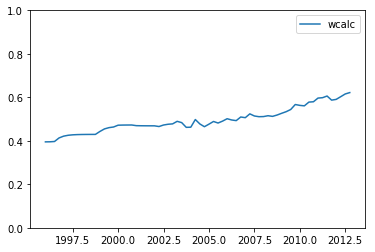

In [65]:
# Load data from wcalc
# specify the location of the mood data file
reload(misc)

group_by = 'quarter'
# read the mood data into a dataframe
if group_by == 'quarter':
    mood = pd.read_csv('wcalc_ssm_quarter_smoothed.csv', header=0)
    mood['date'] = [pd.Timestamp(pd.datetime(int(mood.loc[i].year), (int(mood.loc[i].quarter))*3, 1)) for i in mood.index]
else:
    sys.exit()

mood = mood[mood['date'] >= pd.datetime(first_year, 1, 1)]
mood = mood[mood['date'] <= last_date]  

mood = misc.convert_dates(mood, first_year)
mood = misc.get_f_dates(mood, first_year, group_by)
mood.index = mood.p_quarter

# convert each quarter to a group (year/quarter)
if group_by == 'quarter':
    groups = mood.groupby('p_quarter')
elif group_by == 'month':
    groups = mood.groupby('p_month')
else:
    sys.exit()
    
# normalize and transform mood
mood['mood'] = mood['mood'] / 100.0
mood['transformed'] = np.log(mood.mood / (1 - mood.mood))

# store the vector of mood values from the previous quarter as a separate vector
mood['prev_mood'] = mood['mood'].shift().as_matrix()
mood['prev_transformed'] = mood['transformed'].shift().as_matrix()

# copy the mood data into the grouped dataframe (with the framing data)
grouped['mood'] = mood.mood
grouped['transformed'] = mood.transformed
grouped['prev_mood'] = mood.prev_mood
grouped['prev_transformed'] = mood.prev_transformed
grouped['mood_diff'] = grouped['mood'] - grouped['prev_mood']
grouped['transformed_diff'] = grouped['transformed'] - grouped['prev_transformed']
grouped['logTone'] = np.log(grouped['tone'] / np.mean(grouped['tone']))

#temp = pd.read_csv('immigration_grouped.csv')
#grouped['p_t'] = temp['p_t_means']

fig, ax = plt.subplots()
ax.plot(grouped.f_date, grouped.mood, label='wcalc')
#ax.plot(grouped.f_date, grouped.p_t, label='p_t')
ax.legend()
plt.ylim(0, 1)



In [23]:
grouped['normalized_tone'] = grouped['tone'] / np.max(np.abs(grouped['tone'].values))
print grouped['normalized_tone'].min(), grouped['normalized_tone'].max()
fitted, rmse, model = stats.ols(df=grouped, target='mood', columns=['prev_mood', 'normalized_tone'])

0.00660480436594 1.0
Rmse: 0.00926894143086
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1191.
Date:                Thu, 25 May 2017   Prob (F-statistic):           2.31e-51
Time:                        15:16:21   Log-Likelihood:                 220.10
No. Observations:                  67   AIC:                            -434.2
Df Residuals:                      64   BIC:                            -427.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [24]:
divisor = np.max([np.max(grouped['Pro'].values), np.max(grouped['Anti'].values)])
grouped['normalized_pro'] = grouped['Pro'] / divisor
grouped['normalized_anti'] = grouped['Anti'] / divisor
fitted, rmse, model = stats.ols(df=grouped, target='mood', columns=['prev_mood', 'normalized_pro', 'normalized_anti'])


Rmse: 0.00900585621191
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     842.9
Date:                Thu, 25 May 2017   Prob (F-statistic):           8.99e-51
Time:                        15:16:27   Log-Likelihood:                 222.56
No. Observations:                  67   AIC:                            -437.1
Df Residuals:                      63   BIC:                            -428.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          

In [25]:
divisor = np.max([np.max(grouped['top_pro_counts'].values), np.max(grouped['top_anti_counts'].values)])
grouped['normalized_top_pro'] = grouped['top_pro_counts'] / divisor
grouped['normalized_top_anti'] = grouped['top_anti_counts'] / divisor
grouped['normalized_top_diff'] = grouped['normalized_top_pro'] - grouped['normalized_top_anti']
fitted, rmse, model = stats.ols(df=grouped, target='mood', columns=['prev_mood', 'normalized_top_diff'])

Rmse: 0.00912430696418
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1230.
Date:                Thu, 25 May 2017   Prob (F-statistic):           8.45e-52
Time:                        15:16:32   Log-Likelihood:                 221.15
No. Observations:                  67   AIC:                            -436.3
Df Residuals:                      64   BIC:                            -429.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept  

In [26]:
divisor = np.max([np.max(grouped['top_pro_counts'].values), np.max(grouped['top_anti_counts'].values)])
grouped['normalized_top_pro'] = grouped['top_pro_counts'] / divisor
grouped['normalized_top_anti'] = grouped['top_anti_counts'] / divisor
fitted, rmse, model = stats.ols(df=grouped, target='mood', columns=['prev_mood', 'normalized_top_pro', 'normalized_top_anti'])

Rmse: 0.00886081027317
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     871.4
Date:                Thu, 25 May 2017   Prob (F-statistic):           3.23e-51
Time:                        15:16:39   Log-Likelihood:                 223.64
No. Observations:                  67   AIC:                            -439.3
Df Residuals:                      63   BIC:                            -430.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept  

In [27]:
divisor = np.max([np.max(grouped['d_pro'].values), np.max(grouped['d_anti'].values)])
grouped['normalized_d_pro'] = grouped['d_pro'] / divisor
grouped['normalized_d_anti'] = grouped['d_anti'] / divisor
grouped['normalized_d_diff'] = grouped['normalized_d_pro'] - grouped['normalized_d_anti']
fitted, rmse, model = stats.ols(df=grouped, target='mood', columns=['prev_mood', 'normalized_d_diff'])


Rmse: 0.00910445469481
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1236.
Date:                Thu, 25 May 2017   Prob (F-statistic):           7.35e-52
Time:                        15:16:47   Log-Likelihood:                 221.30
No. Observations:                  67   AIC:                            -436.6
Df Residuals:                      64   BIC:                            -430.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept      

In [28]:
divisor = np.max([np.max(grouped['d_pro'].values), np.max(grouped['d_anti'].values)])
grouped['normalized_d_pro'] = grouped['d_pro'] / divisor
grouped['normalized_d_anti'] = grouped['d_anti'] / divisor
fitted, rmse, model = stats.ols(df=grouped, target='mood', columns=['prev_mood', 'normalized_d_pro', 'normalized_d_anti'])


Rmse: 0.00906041894127
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     832.5
Date:                Thu, 25 May 2017   Prob (F-statistic):           1.31e-50
Time:                        15:16:53   Log-Likelihood:                 222.15
No. Observations:                  67   AIC:                            -436.3
Df Residuals:                      63   BIC:                            -427.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept      

In [72]:
#sel = np.ones_like(grouped.index, dtype=bool)
#sel[:8] = True
sel = grouped['stories'] > 20
subset = grouped.loc[sel]
fitted, rmse, model = stats.ols(df=subset, target='mood', columns=['prev_mood', 'tone', 'd_pro_percent', 'd_anti_percent'])


Rmse: 0.00952854066848
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     551.2
Date:                Thu, 25 May 2017   Prob (F-statistic):           7.95e-45
Time:                        15:55:10   Log-Likelihood:                 203.15
No. Observations:                  62   AIC:                            -396.3
Df Residuals:                      57   BIC:                            -385.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.

In [67]:

fitted, rmse, model = stats.ols(df=grouped, target='mood', columns=['prev_mood', 'tone', 'd_pro_percent', 'd_anti_percent'])


Rmse: 0.00923029363098
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     601.3
Date:                Thu, 25 May 2017   Prob (F-statistic):           7.96e-49
Time:                        15:52:51   Log-Likelihood:                 221.44
No. Observations:                  67   AIC:                            -432.9
Df Residuals:                      62   BIC:                            -421.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.

In [58]:
grouped['toneXtop_pro_percent'] = grouped['tone'] * grouped['top_pro_percent']
grouped['toneXtop_anti_percent'] = grouped['tone'] * grouped['top_anti_percent']
fitted, rmse, model = stats.ols(df=grouped, target='mood', columns=['prev_mood', 'tone', 'top_pro_percent', 'top_anti_percent', 'toneXtop_pro_percent', 'toneXtop_anti_percent'])


Rmse: 0.00879892535452
                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     442.5
Date:                Thu, 25 May 2017   Prob (F-statistic):           1.02e-47
Time:                        15:46:48   Log-Likelihood:                 225.75
No. Observations:                  67   AIC:                            -437.5
Df Residuals:                      60   BIC:                            -422.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Interce

In [29]:
columns = ['prev_mood']
predictions, rmse = stats.eval_loocv(grouped, 'mood', columns)
print "Held-out RMSE:", rmse, columns

columns = ['prev_mood', 'tone']
predictions, rmse = stats.eval_loocv(grouped, 'mood', columns)
print "Held-out RMSE:", rmse, columns

columns = ['prev_mood', 'Pro', 'Anti']
predictions, rmse = stats.eval_loocv(grouped, 'mood', columns)
print "Held-out RMSE:", rmse, columns

columns = ['prev_mood', 'normalized_d_diff']
predictions, rmse = stats.eval_loocv(grouped, 'mood', columns)
print "Held-out RMSE:", rmse, columns

columns = ['prev_mood', 'd_pro', 'd_anti']
predictions, rmse = stats.eval_loocv(grouped, 'mood', columns)
print "Held-out RMSE:", rmse, columns

columns = ['prev_mood', 'normalized_top_diff']
predictions, rmse = stats.eval_loocv(grouped, 'mood', columns)
print "Held-out RMSE:", rmse, columns

columns = ['prev_mood', 'top_pro_counts', 'top_anti_counts']
predictions, rmse = stats.eval_loocv(grouped, 'mood', columns)
print "Held-out RMSE:", rmse, columns

Held-out RMSE: 0.00978122634253 ['prev_mood']
Held-out RMSE: 0.00957740895196 ['prev_mood', 'tone']
Held-out RMSE: 0.00949312409731 ['prev_mood', 'Pro', 'Anti']
Held-out RMSE: 0.00975769278454 ['prev_mood', 'normalized_d_diff']
Held-out RMSE: 0.00980456358967 ['prev_mood', 'd_pro', 'd_anti']
Held-out RMSE: 0.00946945705101 ['prev_mood', 'normalized_top_diff']
Held-out RMSE: 0.00943929043997 ['prev_mood', 'top_pro_counts', 'top_anti_counts']


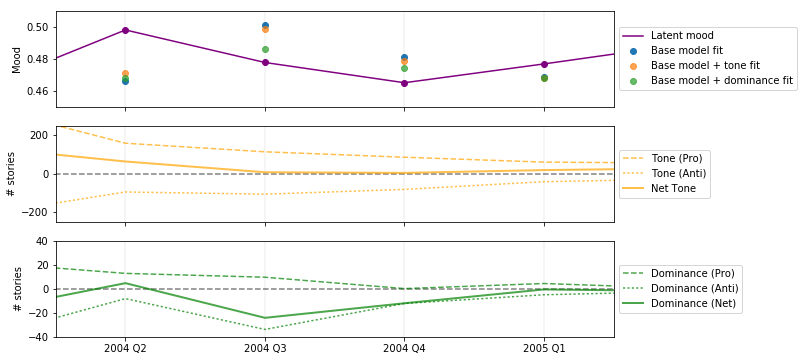

In [243]:
#plt.plot(pred_df.f_date, pred_df.mood, label='Latent mood')
#plt.plot(pred_df.f_date, pred_df.linear_fit, label='Linear fit')
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
ax, ax3, ax2 = axes
for d in grouped.f_date:
    ax.plot([d, d], [0, 1], c='k', alpha=0.05, label=None)
ax.plot(grouped.f_date, grouped.mood, c='purple', label='Latent mood')
ax.scatter(grouped.f_date, grouped.mood, c='purple', label=None)
ax.scatter(pred_df.f_date, pred_df.ar_fit, label='Base model fit')
ax.scatter(pred_df.f_date, pred_df.tone_fit, label='Base model + tone fit', alpha=0.7)
ax.scatter(pred_df.f_date, pred_df.dom_fit, label='Base model + dominance fit', alpha=0.7)
ax.set_ylim(0.45, 0.51)
ax.set_xlim(2004.125, 2005.125)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Mood')

for d in grouped.f_date:
    ax2.plot([d, d], [-40, 40], c='k', alpha=0.05, label=None)
ax2.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', label=None, alpha=0.5)
ax2.plot(grouped.f_date,  grouped.d_pro, 'g--', label='Dominance (Pro)', alpha=0.7)
ax2.plot(grouped.f_date,  -grouped.d_anti, 'g:', label='Dominance (Anti)', alpha=0.7)
ax2.plot(grouped.f_date,  grouped.d_diff, linewidth=2, c='green', label='Dominance (Net)', alpha=0.7)
#ax2.plot(grouped.f_date, -grouped.d_anti, c='red', label='Anti dominance', alpha=0.7)
#ax2.plot(grouped.f_date, grouped.d_pro/np.max(grouped.d_pro)/50.0, 'green', label='d_pro', alpha=0.7)
#ax2.plot(grouped.f_date, -grouped.d_anti/np.max(grouped.d_anti)/50.0, 'green', label='d_anti', alpha=0.7)
#ax2.plot(grouped.f_date, (grouped.mood - 0.5)/10.0, label='mood', c='purple')
#ax.plot(grouped.f_date, (grouped.tone - np.mean(grouped.tone))/np.max(grouped.tone)/100.0, c='red', label='tone')
#ax2.plot(grouped.f_date, grouped.Pro/np.max(grouped.Pro)/100.0, c='red', label='Pro')
#ax2.plot(grouped.f_date, -grouped.Anti/np.max(grouped.Anti)/100.0, c='red', label='Anti')
ax2.set_ylim(-40, 40)
ax2.set_ylabel('# stories')
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for d in grouped.f_date:
    ax3.plot([d, d], [-250, 250], c='k', alpha=0.05, label=None)
ax3.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', label=None, alpha=0.5)
ax3.plot(grouped.f_date, grouped.Pro, linestyle='--', c='orange', label='Tone (Pro)', alpha=0.7)
ax3.plot(grouped.f_date, -grouped.Anti, linestyle=':', c='orange', label='Tone (Anti)', alpha=0.7)
ax3.plot(grouped.f_date, grouped.tone, linewidth=2, c='orange', label='Net Tone', alpha=0.7)
ax3.set_ylim(-250, 250)
ax3.set_ylabel('# stories')
#ax3.set_xticks([2004, 2006])
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax3.set_xticks([2004.25, 2004.5, 2004.75, 2005])
ax3.set_xticklabels(['2004 Q2', '2004 Q3', '2004 Q4', '2005 Q1'])

#for d in grouped.f_date:
#    ax4.plot([d, d], [-250, 250], c='k', alpha=0.05, label=None)
#ax4.plot(grouped.f_date, np.zeros_like(grouped.f_date), 'k--', label=None, alpha=0.5)
#ax4.plot(grouped.f_date, grouped.Legality_jurisdiction_pro, linestyle='--', c='cyan', label='Legality pro')
#ax4.plot(grouped.f_date, grouped.Political_pro,  linestyle='--',c='red', label='Political pro')
#ax4.plot(grouped.f_date, -grouped.Legality_jurisdiction_anti, linestyle=':', c='cyan', label='Legality anti')
#ax4.plot(grouped.f_date, -grouped.Political_anti,  linestyle=':' ,c='red', label='Political anti')
#ax4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax4.set_ylim(-75, 75)

plt.savefig('/Users/dcard/Desktop/example.pdf', bbox_inches='tight')

In [ ]:
# Check out same-sex_marriage1.0-2475.txt

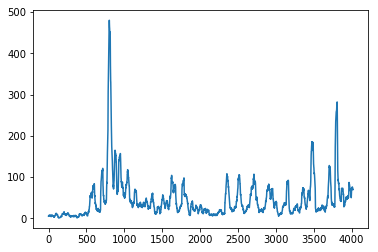

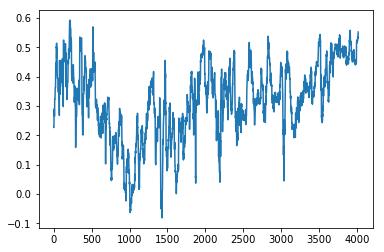

In [146]:
import datetime as dt

first_year = 2002
date_range = pd.date_range(dt.date(first_year, 1, 1), dt.date(last_year, 12, 31))
#date_range = pd.date_range(dt.date(last_year, 12, 1), dt.date(last_year, 12, 31))

period = 30  # days
n_stories = np.zeros(len(date_range))
tones = np.zeros(len(date_range))

for d_i, d in enumerate(date_range):
    rows = (data['date'] <= d)  &  (data['date'] > (d - pd.Timedelta(days=period)))
    n_rows = np.sum(rows)
    n_stories[d_i] = n_rows

    if n_rows > 0:
        mean_tone = data.loc[rows]['tone'].mean()
        tones[d_i] = mean_tone

plt.subplots()
plt.plot(range(len(date_range)), n_stories)
plt.subplots()
plt.plot(range(len(date_range)), tones)

In [161]:
import calendar

reload(misc)

def date_to_float(date):
    year = date.year
    days = (date - pd.datetime(year, 1, 1)).days
    if calendar.isleap(year):
        days_part = days / 366.0
    else:
        days_part = days / 365.0
    return year + days_part

filename = 'samesex_marriage_polls.csv'
polls = misc.load_polls(filename, first_year, last_year=last_year)
polls = misc.get_f_dates(polls, first_year, group_by)
print "Loaded %d polls" % len(polls.index)

# add in indicator variables for each question
varnames = polls['Varname'].values
#questions = list(set(varnames))
#questions.sort()
questions = misc.get_top_poll_questions(polls, n=len(varnames)+1)
question_index = dict(zip(questions, range(len(questions))))    
for q_i, q in enumerate(questions):
    polls.ix[:, q] = 0
for q_i, q in enumerate(questions):
    polls.ix[polls['Varname']==q, 'question'] = q_i
    polls.ix[polls['Varname']==q, q] = 1

polls['n_stories'] = 0
for p in polls.index:
    date = polls.loc[p]['date']
    date_index = (date - pd.datetime(first_year, 1, 1)).days
    polls.loc[p, 'n_stories'] = n_stories[date_index]
    polls.loc[p, 'mean_tone'] = tones[date_index]

dates = [date_to_float(d) for d in polls['date']]
values = polls['value'].ravel()

import pyqt_fit
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods
k0 = smooth.NonParamRegression(dates, values, method=npr_methods.SpatialAverage())
k0.fit()
#plt.plot(grid, k0(grid), label="Spatial Averaging", linewidth=2)
#plt.legend(loc='best')
    
fig, ax = plt.subplots(figsize=(10, 8))
for q_i, q in enumerate(questions[:10]):
    subset = polls[polls['Varname'] == q]
    subset = subset[subset['n_stories'] > 20]
    dates = [date_to_float(d) for d in subset['date']]

    #mean_tones = (subset['mean_tone'].ravel() + 1) / 2.0 * 200
    #plt.scatter(dates, subset['value'], s=mean_tones, facecolor='white', edgecolor='black', alpha=0.5, label=None)
    plt.scatter(dates, subset['value'], s=subset['n_stories'], facecolor='C' + str(q_i), alpha=0.5, label=q)
    #plt.scatter(dates, subset['value'],  alpha=0.5, label=q)
    plt.scatter(dates, subset['mean_tone'], s=subset['n_stories'], facecolor='w', edgecolor='C' + str(q_i), alpha=0.5, label=None)
#plt.legend(loc='lower right')

grid = [date_to_float[d] for d in date_range]
plt.plot(grid, k0(grid), lable=None)


                       
#reload(plotting)
#plotting.plot_polling_data(polls)
#plotting.plot_polling_data(polls, transform=False)

Loaded 156 polls


ImportError: cannot import name path